In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
import numpy as np
import eeghdf
import h5py
import sys
sys.path.append("./eeg-hdfstorage/notebooks/")
import stacklineplot

In [3]:
filename = "./eeg-hdfstorage/data/absence_epilepsy.eeghdf"

In [4]:
def load_eeg_file_h5py(filename):
	hdf = h5py.File(filename, "r")
	atributes = hdf["patient"].attrs
	rec = hdf["record-0"]
	signals = rec["signals"]
	return signals

In [5]:
def load_eeg_file_eeghdf(filename):
    file = eeghdf.Eeghdf(filename)
    return file.phys_signals
    

In [6]:
a = load_eeg_file_h5py(filename)[:, 10000:10000 + 1004]
b = load_eeg_file_eeghdf(filename)[:, 10000:10000 + 1004]

self._phys_offset: [-0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003  0.03589933  0.03589933  0.5       ]


In [7]:
print(a.shape)
print(b.shape)

(36, 1004)
(36, 1004)


In [8]:
num_channels = 10

In [9]:
labels = [str(i) for i in range(a.shape[0])]

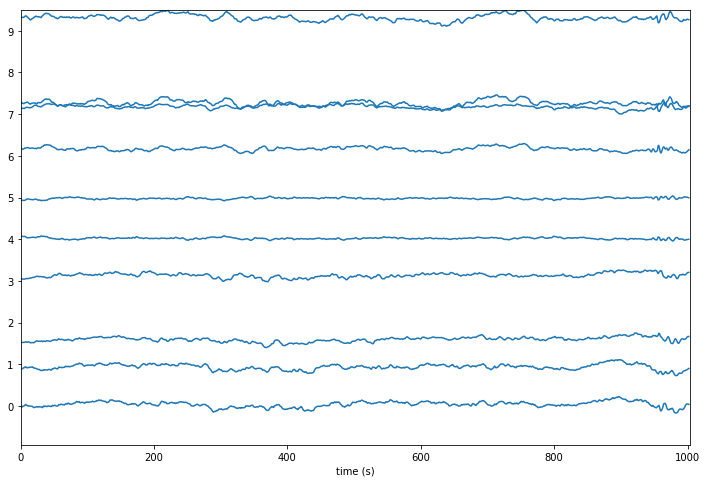

In [10]:
stacklineplot.stackplot(a[:num_channels], ylabels=labels[:num_channels], yscale=1)

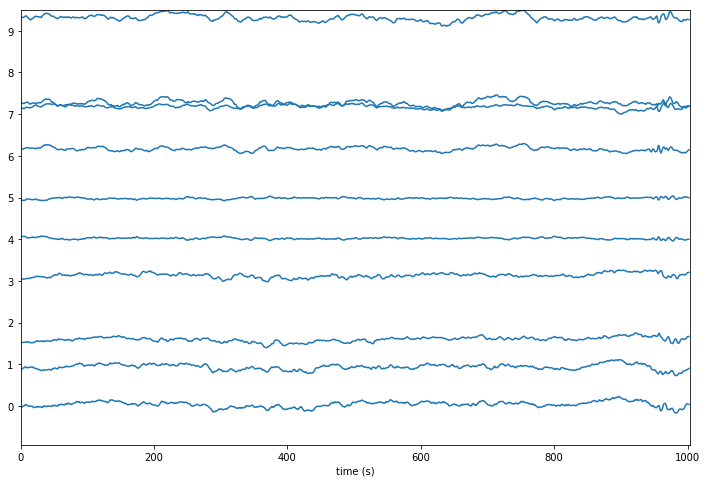

In [11]:
stacklineplot.stackplot(b[:num_channels], ylabels=labels[:num_channels], yscale=1)

In [12]:
def save_EEG(data,num_channels, frequency, filename, channel_names=None):
	if data.shape[1] < 10000:
		np.save(filename, data[0, :, :])
	else:
		np.save(filename, data[0, :10000, :])

In [13]:
c = np.tile(a, 64).reshape(64, 36, 1004)

In [14]:
save_EEG(c, None,None, "test_save")

In [21]:
loader_test_filename = "save_dataloader.npy"

In [25]:
test_2 = np.load(loader_test_filename).T

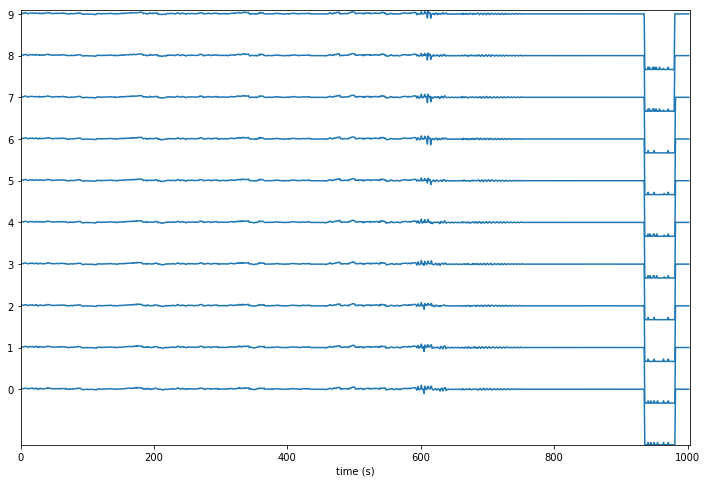

In [26]:
stacklineplot.stackplot(test_2[:num_channels], ylabels=labels[:num_channels], yscale=1)